<a href="https://colab.research.google.com/github/matteoilardi/LSN_Exercises/blob/main/es11/LSN_Ilardi_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>





In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

### Overview

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.


### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data.

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

In [ ]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [ ]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.05 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

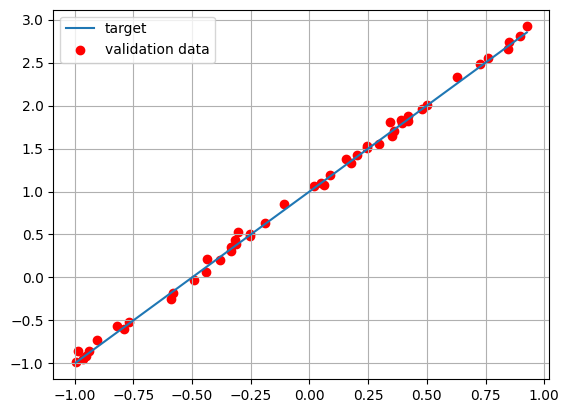

In [ ]:
# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train,
          batch_size=10, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
50/50 [==============================] - 1s 12ms/step - loss: 1.1985 - mse: 1.1985 - val_loss: 0.6028 - val_mse: 0.6028
Epoch 2/50
50/50 [==============================] - 1s 12ms/step - loss: 0.4501 - mse: 0.4501 - val_loss: 0.2660 - val_mse: 0.2660
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.2085 - mse: 0.2085 - val_loss: 0.1308 - val_mse: 0.1308
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1040 - mse: 0.1040 - val_loss: 0.0665 - val_mse: 0.0665
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0534 - mse: 0.0534 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0090 - mse: 0.

In [ ]:
# return weights and biases
model.get_weights()

[array([[2.0053794]], dtype=float32), array([0.99517524], dtype=float32)]

In [ ]:
# evaluate model
print('Model evaluation with validation data:')
score = model.evaluate(x_valid, y_valid, batch_size=10, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print()
print('Model evaluation with the exact curve:')
score = model.evaluate(x_valid, y_target, batch_size=10, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model evaluation with validation data:
5/5 [==============================] - 0s 3ms/step - loss: 0.0028 - mse: 0.0028

Test loss: 0.0027640422340482473
Test accuracy: 0.0027640422340482473

Model evaluation with the exact curve:
5/5 [==============================] - 0s 3ms/step - loss: 3.5227e-05 - mse: 3.5227e-05

Test loss: 3.5226865293225273e-05
Test accuracy: 3.5226865293225273e-05


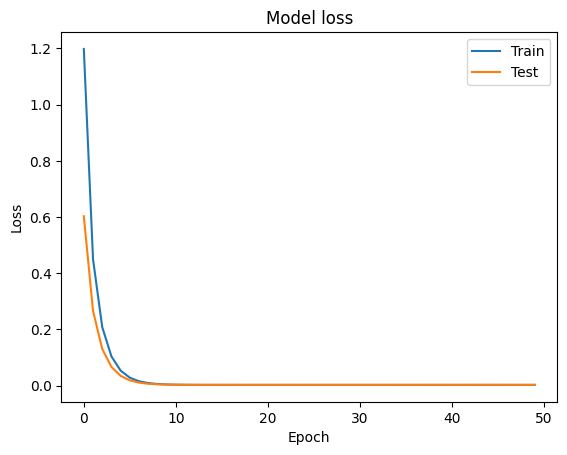

In [ ]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 4ms/step


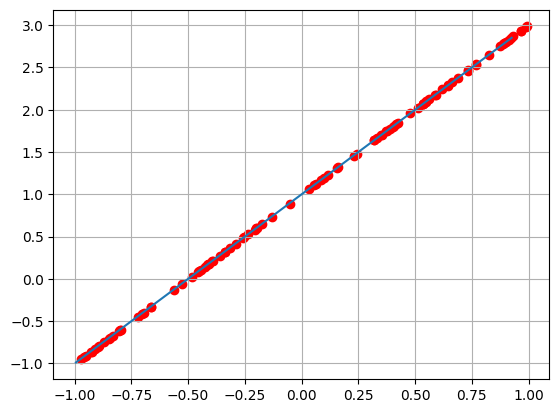

In [ ]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Remarks
- The most suitable model for a linear fit consits of only one neuron with linear output. It provides two trainable parameters (weight and bias) that match exactly the two parameters of the target function, the angular coefficient and the intercept respectively.
- The number of epochs tells how many times the entire training dataset is fed to the model. In this particular case, the loss function saturates at around 20 epochs (see the graph above).
- The choice of smaller batches generally improves accuracy: stochastic gradient descent is performed more times on a smaller amount of data, leading to faster convergence (with respect to the number of epochs). However, it takes longer for the model to train within each epoch.
- If Gaussian noise is added to the training data, the loss function increases. Nonetheless, the model manages to correctly predict the values of the parameters.


### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set?
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.


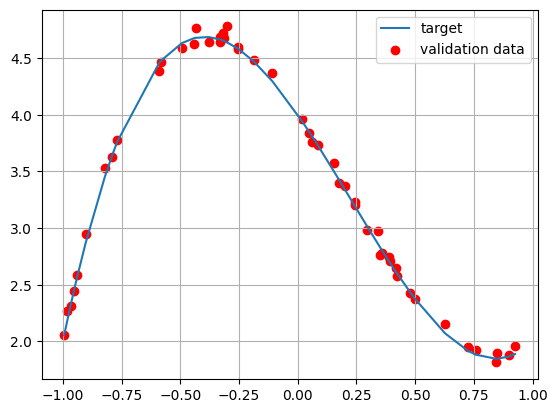

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# target function
def f(x):
  a = 3
  b = -2
  c = -3
  d = 4
  return a*x**3 + b*x**2 + c*x + d

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = f(x_valid); # ideal (target) linear function

sigma = 0.05 # noise standard deviation
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# define the model
model = tf.keras.Sequential()
model.add(Dense(8, input_shape=(1,), activation='tanh'))
model.add(Dense(3, input_shape=(1,), activation='tanh'))
model.add(Dense(1, input_shape=(1,), activation='linear'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 8)                 16        
                                                                 
 dense_115 (Dense)           (None, 3)                 27        
                                                                 
 dense_116 (Dense)           (None, 1)                 4         
                                                                 
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train,
          batch_size=10, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
50/50 [==============================] - 1s 6ms/step - loss: 3.2041 - mse: 3.2041 - val_loss: 0.6916 - val_mse: 0.6916
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5020 - mse: 0.5020 - val_loss: 0.5132 - val_mse: 0.5132
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.3134 - mse: 0.3134 - val_loss: 0.3515 - val_mse: 0.3515
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1879 - mse: 0.1879 - val_loss: 0.2006 - val_mse: 0.2006
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1118 - mse: 0.1118 - val_loss: 0.1286 - val_mse: 0.1286
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0740 - mse: 0.0740 - val_loss: 0.0880 - val_mse: 0.0880
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0539 - mse: 0.0539 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 8/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0412 - mse: 0.04

In [ ]:
# evaluate model
print('Model evaluation with validation data:')
score = model.evaluate(x_valid, y_valid, batch_size=10, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print()
print('Model evaluation with the exact curve:')
score = model.evaluate(x_valid, y_target, batch_size=10, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model evaluation with validation data:
5/5 [==============================] - 0s 4ms/step - loss: 0.0102 - mse: 0.0102

Test loss: 0.010235253721475601
Test accuracy: 0.010235253721475601

Model evaluation with the exact curve:
5/5 [==============================] - 0s 5ms/step - loss: 0.0091 - mse: 0.0091

Test loss: 0.009146913886070251
Test accuracy: 0.009146913886070251


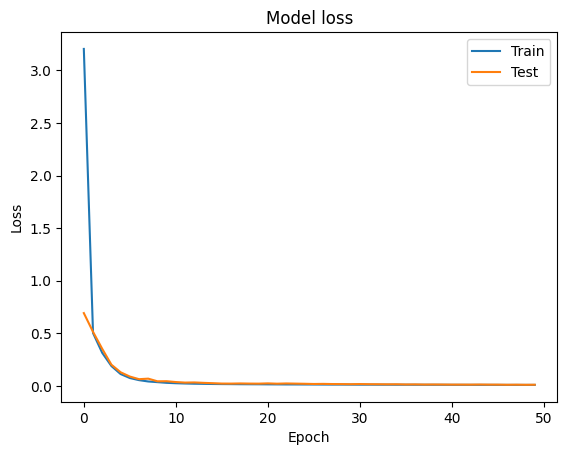

In [ ]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 3ms/step


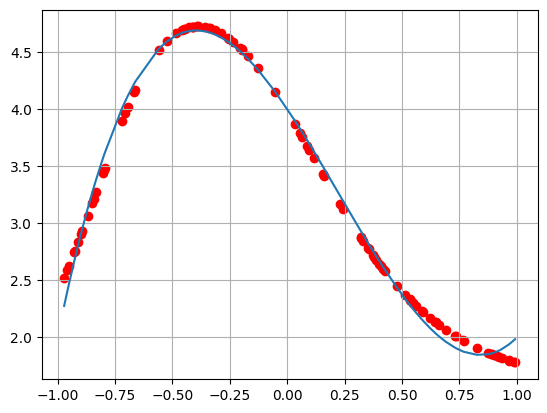

4/4 [==============================] - 0s 3ms/step


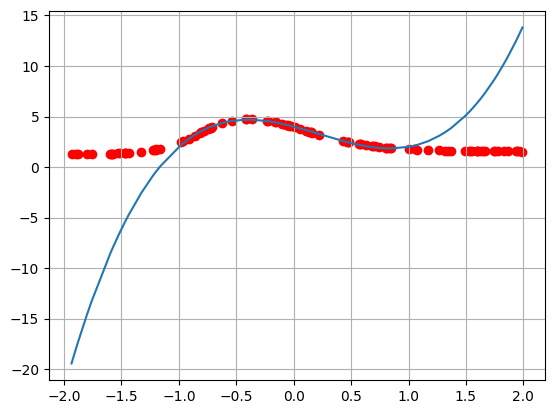

In [ ]:
# plot model predictions in the training interval
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
x_predicted.sort()
plt.plot(x_predicted, f(x_predicted))
plt.grid(True)
plt.show()

# plot model predictions outside the training interval
x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
x_predicted.sort()
plt.plot(x_predicted, f(x_predicted))
plt.grid(True)
plt.show()

### Remarks
- Whatever shape we chose for our model, the last layer should consist of one neuron only, since our task is to fit a function. It is reasonable to choose a linear activation for the last neuron, in order not to introduce a bias on the range of the target function. The other layers, insteead, must have nonlinear activations: if they didn't, the model would be capable of fitting linear functions only!
- The most suitable model seems to be one consisting of layers with a decreasing number of neurons ("pyramidal" shape). A "bipyramidal" shape (increasing first, then deacreasing number of neurons per layer) doesn't improve the accuracy of the model significantly, despite the increase in trainable parameters.
- The best activation function seems to be "tanh". Also "relu" is good and yields similar results; however, small segments and angles might show up, owing to its shape. Despite having a shape similar to "tanh", the sigmoid activation turns out to be much worse for this task.
- Speaking of optimizers, stochastic gradient descent ("sgd") and root mean square propagation ("rmsprop") sligthly outperform adaptive moment estimation ("adam").
- The best choice for the loss function seems to be mean square error ("mse"), over mean absolute error ("mae").
- As usual, a smaller batch size improves accuracy at fixed number of epochs.
- In this case, the Gaussian noise does't affect much the loss function. Moreover, while training the model coded above, no signs of overfitting showed up, even for $\sigma = 0.1$.
- As shown above, the model fails to predict accurately outside the interval where it was trained.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [ ]:
# target function
def g(x, y):
  return np.sin(x**2 + y**2)

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, 500)
x_valid = np.random.uniform(-1.5, 1.5, 50)
x_valid.sort()
y_train = np.random.uniform(-1.5, 1.5, 500)
y_valid = np.random.uniform(-1.5, 1.5, 50)
y_valid.sort()
z_target = g(x_valid, y_valid); # ideal (target) linear function

sigma = 0.05 # noise standard deviation
z_train = np.random.normal(g(x_train, y_train), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(g(x_valid, y_valid), sigma)

In [ ]:
# define the model
model = tf.keras.Sequential()
model.add(Dense(120, input_shape=(2,), activation='relu'))
model.add(Dense(60, input_shape=(2,), activation='relu'))
model.add(Dense(30, input_shape=(2,), activation='relu'))
model.add(Dense(15, input_shape=(2,), activation='relu'))
model.add(Dense(7, input_shape=(2,), activation='relu'))
model.add(Dense(1, input_shape=(2,), activation='linear'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 120)               360       
                                                                 
 dense_118 (Dense)           (None, 60)                7260      
                                                                 
 dense_119 (Dense)           (None, 30)                1830      
                                                                 
 dense_120 (Dense)           (None, 15)                465       
                                                                 
 dense_121 (Dense)           (None, 7)                 112       
                                                                 
 dense_122 (Dense)           (None, 1)                 8         
                                                                 
Total params: 10,035
Trainable params: 10,035
Non-tra

In [ ]:
# fit the model using training dataset
# report training progress against validation data



history = model.fit(x=np.column_stack((x_train, y_train)), y=z_train,
          batch_size=10, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(np.column_stack((x_valid, y_valid)), z_valid))

Epoch 1/50
50/50 [==============================] - 2s 24ms/step - loss: 0.2274 - mse: 0.2274 - val_loss: 0.5603 - val_mse: 0.5603
Epoch 2/50
50/50 [==============================] - 0s 8ms/step - loss: 0.1672 - mse: 0.1672 - val_loss: 0.4650 - val_mse: 0.4650
Epoch 3/50
50/50 [==============================] - 0s 6ms/step - loss: 0.1560 - mse: 0.1560 - val_loss: 0.4844 - val_mse: 0.4844
Epoch 4/50
50/50 [==============================] - 0s 6ms/step - loss: 0.1472 - mse: 0.1472 - val_loss: 0.4947 - val_mse: 0.4947
Epoch 5/50
50/50 [==============================] - 0s 6ms/step - loss: 0.1326 - mse: 0.1326 - val_loss: 0.4670 - val_mse: 0.4670
Epoch 6/50
50/50 [==============================] - 0s 6ms/step - loss: 0.1245 - mse: 0.1245 - val_loss: 0.3555 - val_mse: 0.3555
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.1095 - mse: 0.1095 - val_loss: 0.4669 - val_mse: 0.4669
Epoch 8/50
50/50 [==============================] - 0s 4ms/step - loss: 0.0919 - mse: 0.0

In [ ]:
# evaluate model
print('Model evaluation:')
score = model.evaluate(np.column_stack((x_valid, y_valid)), z_valid, batch_size=10, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model evaluation:
5/5 [==============================] - 0s 3ms/step - loss: 0.0170 - mse: 0.0170

Test loss: 0.016990967094898224
Test accuracy: 0.016990967094898224


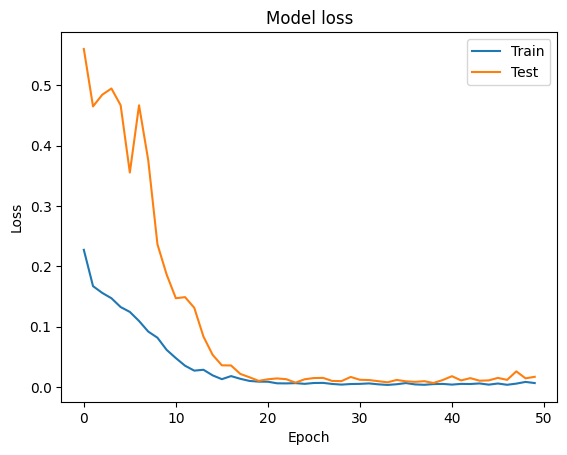

In [ ]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

313/313 [==============================] - 1s 2ms/step


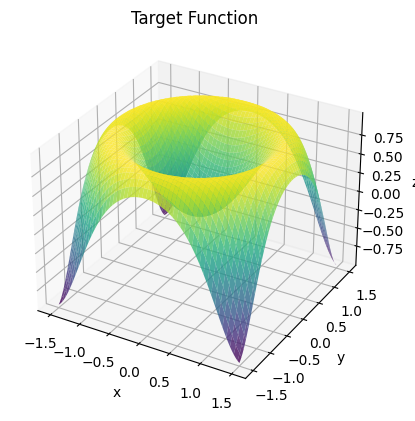

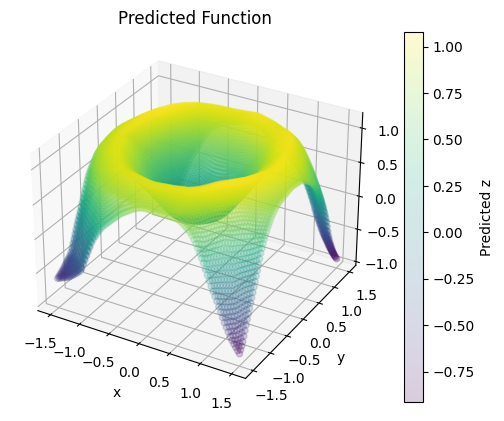

In [ ]:
# Generate grid points to evaluate the function over the given range
x_pred = np.linspace(-1.5, 1.5, 100)
y_pred = np.linspace(-1.5, 1.5, 100)
x_pred, y_pred = np.meshgrid(x_pred, y_pred)
z_target = g(x_pred, y_pred)

# Flatten the grid points for prediction
x_pred_flat = x_pred.flatten()
y_pred_flat = y_pred.flatten()

# Predict the function values using the trained model
z_pred = model.predict(np.column_stack((x_pred_flat, y_pred_flat)))
z_pred = z_pred.reshape(x_pred.shape)

# Plot the target function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_pred, y_pred, z_target, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Target Function')
plt.show()


# Scatter plot of predicted points with color mapping
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x_pred_flat, y_pred_flat, z_pred, c=z_pred, cmap='viridis', alpha= 0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Predicted Function')

# Add a colorbar to the plot
cbar = fig.colorbar(sc)
cbar.set_label('Predicted z')

plt.show()

### Remarks
- The model was adapted to the present task adding some layers and increasing the number of neurons per layer, but preserving the overall pyramidal "structure". Since we are now trying to fit a function of two variables, a two-dimensional input was chosen for the neurons.
- In this case, "relu" turned out to perform slightly better than "tanh". Again, the sigmoid activation isn't suitable for our task.
- Adaptive moment estimation outperforms both stochastical gradient descent and root mean square propagation.
- Mean square error and mean absolute error yield similar results as loss functions, although "rms" leads to a swifter convergence.
- Gaussian noise seems to affect accuracy more than in the one-dimensional case. With 50 epochs and a batch size of 10, overfitting starts around $\sigma = 0.4$.